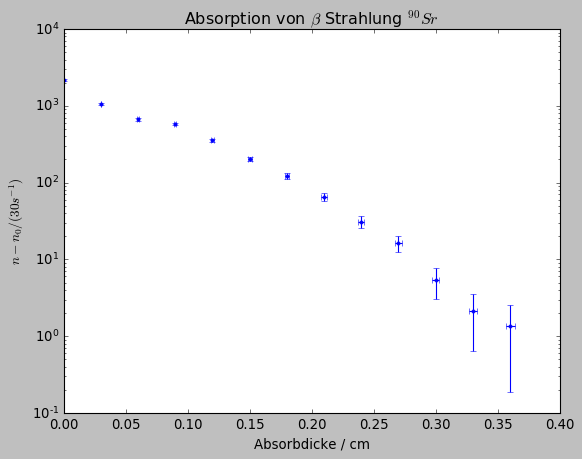

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as mlps
mlps.use('classic')
# Aufgabe 1
al_p = np.linspace(0, 12, 13)
al_p *= 0.03
n0 = 149 / 10            # 5 min in 30 sec umwandeln
n = np.array([2195, 1062, 680, 596, 371, 219, 547/4, 323/4, 183/4, 125/4, 81/4, 68/4, 65/4])  # 2 min in 30 sec umwandeln
n = np.array([i - n0 for i in n])
fehler_n = np.sqrt(n)
plt.errorbar(al_p, n, xerr = np.array([i*0.01 for i in al_p]), yerr = fehler_n, marker = '.', linestyle = 'None')
plt.yscale('log')
plt.xlabel('Absorbdicke / cm')
plt.ylabel('$n - n_0 / (30 s^{-1})$')
plt.title('Absorption von $\\beta$ Strahlung $^{90}Sr$')
#plt.savefig('1.pdf',format='pdf',dpi=1000)
plt.show()

0.645523252927 4037.37245345
0.024149794674 90.0765336185


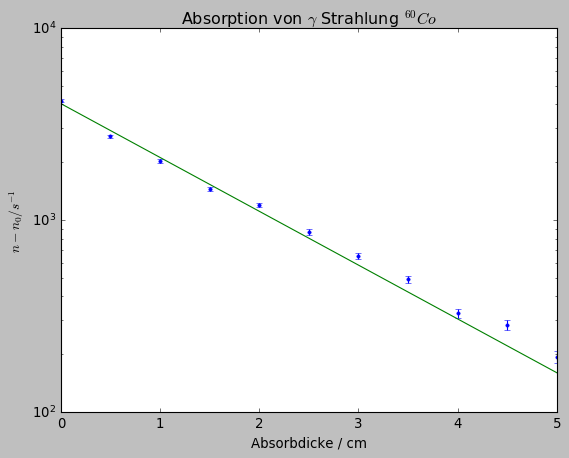

Schwärungskoeffizient für in Blei: mu = -Steigung = 6.4552e-01 +- 5.83e-04


In [39]:
# Aufgabe 2
pb_p = np.linspace(0, 10, 11)
pb_p *= 0.5
n0 = 149 / 5           # 5 min in 60 sec umwandeln
n = np.array([4221, 2765, 2062, 1478, 1228, 894, 679, 520, 357, 313, 224])
n = np.array([i - n0 for i in n])
fehler_n = np.array([np.sqrt(i) for i in n])
def lin(x, a, b):
    return np.exp(-a * x ) * b
from scipy.optimize import curve_fit
popt, pcov = curve_fit(lin, pb_p, n)
plt.errorbar(pb_p, n, yerr = fehler_n, marker = '.', linestyle = 'None')
plt.plot(pb_p, lin(pb_p, popt[0], popt[1]))
plt.xlabel('Absorbdicke / cm')
plt.ylabel('$n - n_0 / s^{-1}$')
plt.title('Absorption von $\gamma$ Strahlung $^{60}Co$')
plt.yscale('log')
#plt.savefig('2.pdf',format='pdf',dpi=1000)
print(popt[0], popt[1])
print(np.sqrt(pcov[0][0]), np.sqrt(pcov[1][1]))
plt.show()
print('Schwärungskoeffizient für in Blei: mu = -Steigung = {v:.4e} +- {val:.2e}'.format(v = popt[0], val = pcov[0][0]))

In [11]:
# Aufgabe 3
eps_b = 1           # epsilon_betta
eps_g = 0.04        # epsilon_gamma
r = 0.7
def Akt(r, d, n):
    return 4 * n * (d+2)**2 * np.exp(-0.14*0.05697*7.9) /(0.04 * r**2)
def dAkt(r, d, n):
    return np.exp(-0.14*0.05697*7.9)*np.sqrt(430000**2 + (0.14*0.0021*7.9)**2)
d = np.array([4.5, 10, 20])
n = np.array([56704, 13343, 3233])
z = np.array([i/120. - n0/30. for i in n])
print(z)
print(np.sqrt(z))
print('Aktivität des gamma-Strahlers: ', Akt(r, d[0], z[0]),dAkt(r, d[0], z[0]))
print('Aktivität des gamma-Strahlers: ', Akt(r, d[1], z[1]),dAkt(r, d[1], z[1]))
print('Aktivität des gamma-Strahlers: ', Akt(r, d[2], z[2]),dAkt(r, d[2], z[2]))

[ 472.03666667  110.695        26.445     ]
[ 21.72640483  10.52116914   5.14247022]
Aktivität des gamma-Strahlers:  3821571.46344 403742.132665
Aktivität des gamma-Strahlers:  3054428.99575 403742.132665
Aktivität des gamma-Strahlers:  2452609.86141 403742.132665


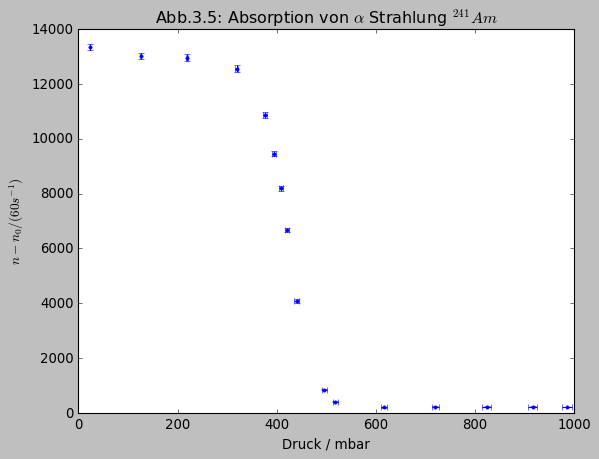

In [59]:
p = np.array([23,126,219,319,421,376,395,408,518,616,720, 823,916,985,440,496])
zahl = np.array([13376,13040,12988,12588,6710,10887,9486,8228,441,241,260,262,264,246,4114,885])
zahl = np.array([i - n0 for i in zahl])
fehler_zahl = np.sqrt(zahl)
plt.errorbar(p, zahl, xerr = np.array([i*0.01 for i in p]), yerr = fehler_zahl, marker = '.', linestyle = 'None')
plt.xlabel('Druck / mbar')
plt.ylabel('$n - n_0 / (60 s^{-1})$')
plt.title('Abb.3.5: Absorption von $\\alpha$ Strahlung $^{241}Am$')
plt.savefig('a.pdf',format='pdf',dpi=1000)
plt.show()